In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import normalize
from sklearn.cluster import DBSCAN
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
crime_data=pd.read_csv("crime_data.csv")
crime_data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


# EDA

In [3]:
crime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [4]:
crime_data.rename(columns= {"Unnamed: 0":"place" }, inplace=True)

In [5]:
crime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   place     50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [6]:
crime_data1=crime_data.drop(columns='place', axis=1)
crime_data1

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


# Normalizing tha data

In [7]:
crime_data_norm=pd.DataFrame(normalize(crime_data1),columns=crime_data1.columns)
crime_data_norm

,Murder,Assault,UrbanPop,Rape
0,0.054031,0.966016,0.237411,0.086778
1,0.036872,0.969739,0.176987,0.164081
2,0.026439,0.959624,0.261122,0.101185
3,0.044528,0.961392,0.252998,0.098669
4,0.030657,0.940134,0.309972,0.138295
5,0.035594,0.919142,0.351437,0.174367
6,0.024486,0.816202,0.571341,0.082362
7,0.023674,0.954965,0.288897,0.063397
8,0.044478,0.967547,0.231056,0.092134
9,0.078534,0.952332,0.270805,0.116446


# Hierarchical clustering

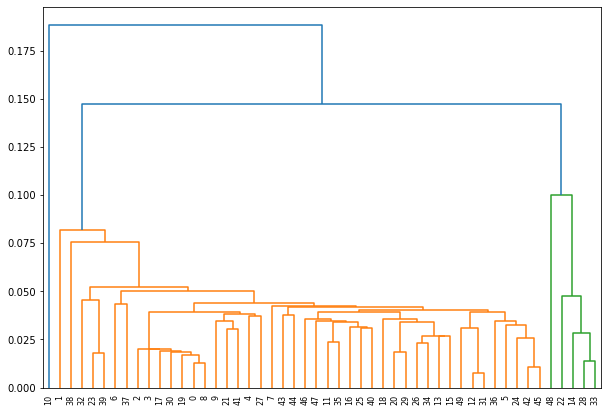

In [8]:
plt.figure(figsize=(10, 7))  
dendograms=sch.dendrogram(sch.linkage(crime_data_norm, method='single'))

In [9]:
hclusters=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='single')
hclusters

AgglomerativeClustering(linkage='single', n_clusters=3)

In [10]:
y=pd.DataFrame(hclusters.fit_predict(crime_data_norm),columns=['h-clusters'])
y['h-clusters'].value_counts()

2    44
0     5
1     1
Name: h-clusters, dtype: int64

In [11]:
crime_data1['place']=crime_data['place']
crime_data1['h-clusters']=hclusters.labels_
crime_data1

,Murder,Assault,UrbanPop,Rape,place,h-clusters
0,13.2,236,58,21.2,Alabama,2
1,10.0,263,48,44.5,Alaska,2
2,8.1,294,80,31.0,Arizona,2
3,8.8,190,50,19.5,Arkansas,2
4,9.0,276,91,40.6,California,2
5,7.9,204,78,38.7,Colorado,2
6,3.3,110,77,11.1,Connecticut,2
7,5.9,238,72,15.8,Delaware,2
8,15.4,335,80,31.9,Florida,2
9,17.4,211,60,25.8,Georgia,2


In [12]:
crime_data1.groupby('h-clusters').agg(['mean']).reset_index()

C:\Users\Asus\AppData\Local\Temp\ipykernel_10488\3635505553.py:1: FutureWarning: ['place'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  crime_data1.groupby('h-clusters').agg(['mean']).reset_index()


,h-clusters,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,2.080000,56.600000,57.800000,10.760000
1,1,5.300000,46.000000,83.000000,20.200000
2,2,8.493182,186.568182,66.022727,22.445455


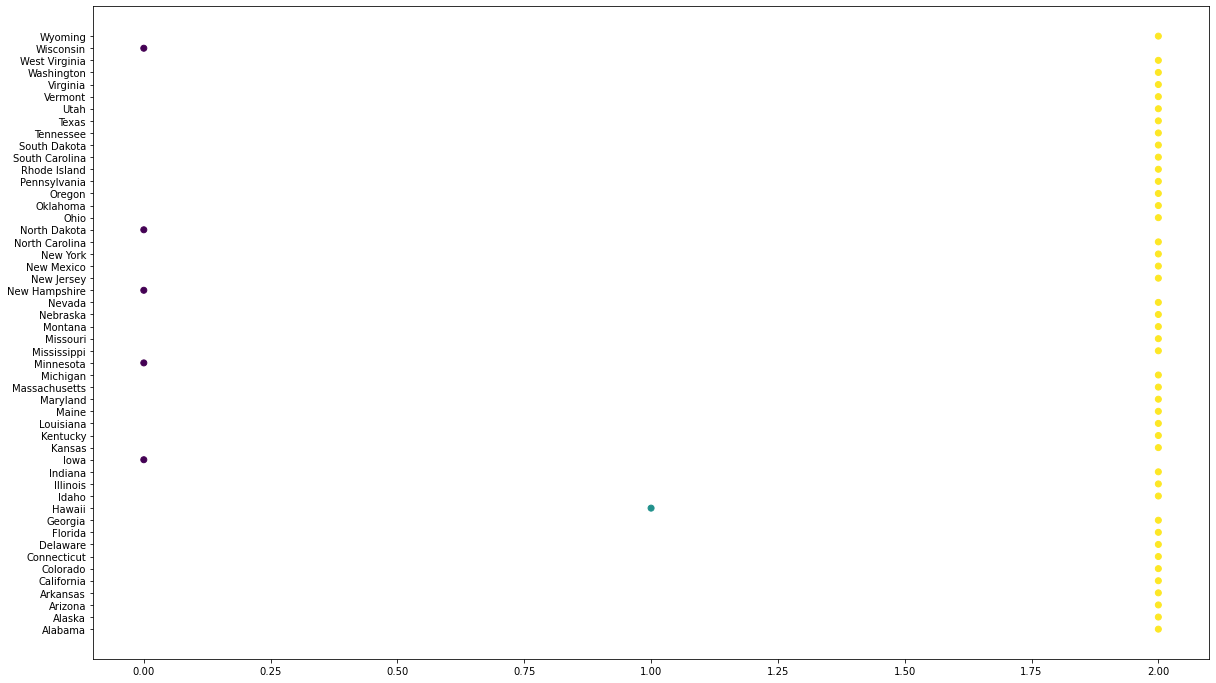

In [13]:
plt.figure(figsize=(20, 12))  
plt.scatter(crime_data1['h-clusters'],crime_data1['place'], c=hclusters.labels_) 

In [14]:
from sklearn.metrics import silhouette_score
h_score = silhouette_score(crime_data_norm, hclusters.labels_, metric='euclidean')
h_score

0.5431936191625951

In [15]:
## Good silhouette score but 0.8 and more good score

# DB-SCAN

In [16]:
crime_data_norm

,Murder,Assault,UrbanPop,Rape
0,0.054031,0.966016,0.237411,0.086778
1,0.036872,0.969739,0.176987,0.164081
2,0.026439,0.959624,0.261122,0.101185
3,0.044528,0.961392,0.252998,0.098669
4,0.030657,0.940134,0.309972,0.138295
5,0.035594,0.919142,0.351437,0.174367
6,0.024486,0.816202,0.571341,0.082362
7,0.023674,0.954965,0.288897,0.063397
8,0.044478,0.967547,0.231056,0.092134
9,0.078534,0.952332,0.270805,0.116446


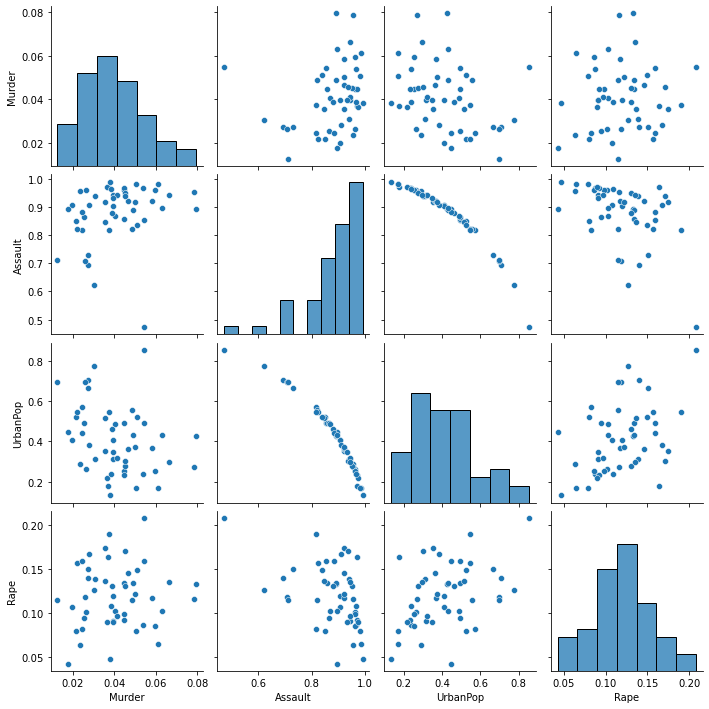

In [17]:
sns.pairplot(crime_data_norm)

In [18]:
dbscan=DBSCAN(eps=0.05,min_samples=3)
dbscan.fit(crime_data_norm)

DBSCAN(eps=0.05, min_samples=3)

In [19]:
dbscan.labels_

array([ 0, -1,  0,  0,  0,  0, -1,  0,  0,  0, -1,  0,  0,  0,  1,  0,  0,
        0,  0,  0,  0,  0,  1,  2,  0,  0,  0,  0,  1,  0,  0,  0,  2,  1,
        0,  0,  0, -1, -1,  2,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0],
      dtype=int64)

In [20]:
crime_data1['db_clusters']=dbscan.labels_
crime_data1

,Murder,Assault,UrbanPop,Rape,place,h-clusters,db_clusters
0,13.2,236,58,21.2,Alabama,2,0
1,10.0,263,48,44.5,Alaska,2,-1
2,8.1,294,80,31.0,Arizona,2,0
3,8.8,190,50,19.5,Arkansas,2,0
4,9.0,276,91,40.6,California,2,0
5,7.9,204,78,38.7,Colorado,2,0
6,3.3,110,77,11.1,Connecticut,2,-1
7,5.9,238,72,15.8,Delaware,2,0
8,15.4,335,80,31.9,Florida,2,0
9,17.4,211,60,25.8,Georgia,2,0


In [21]:
crime_data1['db_clusters'].value_counts()

 0    37
-1     6
 1     4
 2     3
Name: db_clusters, dtype: int64

In [22]:
crime_data1.groupby('db_clusters').agg(['mean']).reset_index()

C:\Users\Asus\AppData\Local\Temp\ipykernel_10488\1354316764.py:1: FutureWarning: ['place'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  crime_data1.groupby('db_clusters').agg(['mean']).reset_index()


,db_clusters,Murder,Assault,UrbanPop,Rape,h-clusters
,,mean,mean,mean,mean,mean
0,-1,5.150000,125.333333,72.166667,18.300000,1.5
1,0,8.302703,180.567568,67.135135,23.056757,2.0
2,1,1.950000,57.500000,55.750000,10.750000,0.0
3,2,14.500000,291.666667,45.666667,18.566667,2.0


DBSCAN PLOT


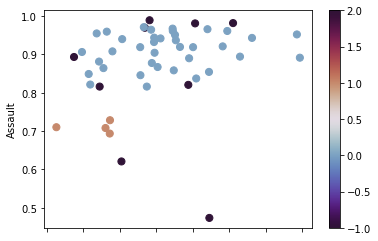

In [23]:
crime_data_norm.plot(x="Murder",y="Assault",c = dbscan.labels_, kind = "scatter", s=50, cmap = plt.cm.twilight_shifted)
print("DBSCAN PLOT")

DBSCAN PLOT


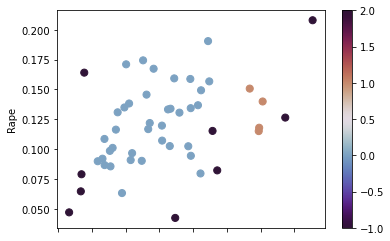

In [24]:
crime_data_norm.plot(x="UrbanPop",y="Rape",c = dbscan.labels_, kind = "scatter", s=50, cmap = plt.cm.twilight_shifted)
print("DBSCAN PLOT")

DBSCAN PLOT


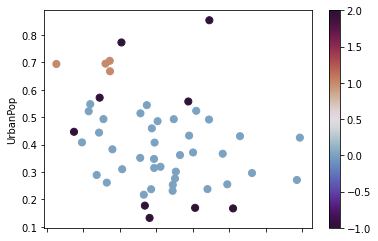

In [25]:
crime_data_norm.plot(x="Murder",y="UrbanPop",c = dbscan.labels_, kind = "scatter", s=50, cmap = plt.cm.twilight_shifted)
print("DBSCAN PLOT")

In [26]:
from sklearn.metrics import silhouette_score
db_score = silhouette_score(crime_data_norm, dbscan.labels_, metric='euclidean')
db_score

0.20656984407157822

In [27]:
## This is less sihouette score so model is not performing well may be data is less

# K-MEANS Clustering

In [28]:
crime_data_norm

,Murder,Assault,UrbanPop,Rape
0,0.054031,0.966016,0.237411,0.086778
1,0.036872,0.969739,0.176987,0.164081
2,0.026439,0.959624,0.261122,0.101185
3,0.044528,0.961392,0.252998,0.098669
4,0.030657,0.940134,0.309972,0.138295
5,0.035594,0.919142,0.351437,0.174367
6,0.024486,0.816202,0.571341,0.082362
7,0.023674,0.954965,0.288897,0.063397
8,0.044478,0.967547,0.231056,0.092134
9,0.078534,0.952332,0.270805,0.116446


In [29]:
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,random_state=123)
    kmeans.fit(crime_data_norm)
    wcss.append(kmeans.inertia_)

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [30]:
wcss

[1.9452076233849003,
 0.7540963759591796,
 0.32784780506931327,
 0.2276024576517487,
 0.1639515249164073,
 0.12131705133727907,
 0.10188607971993463,
 0.08858970047383954,
 0.07584024462823499,
 0.06604601089525693]

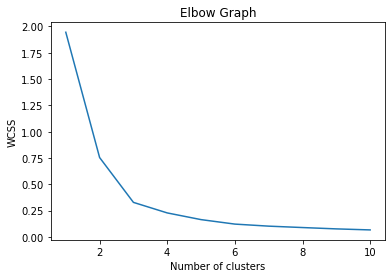

In [31]:
plt.plot(range(1,11),wcss)
plt.title('Elbow Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [32]:
## Based on knee plot we build 3 clusters

In [33]:
k_clusters=KMeans(3,random_state=123).fit(crime_data_norm)
k_clusters

KMeans(n_clusters=3, random_state=123)

In [34]:
k_clusters.labels_

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 1, 0, 1, 2, 1, 1, 0, 1, 0, 1, 0,
       2, 0, 0, 1, 1, 0, 2, 1, 0, 0, 0, 2, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 2, 0])

In [35]:
crime_data2=crime_data.copy()
crime_data2

,place,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [36]:
crime_data2["k_clusters"]=k_clusters.labels_
crime_data2

,place,Murder,Assault,UrbanPop,Rape,k_clusters
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,0
9,Georgia,17.4,211,60,25.8,0


In [37]:
k_clusters.cluster_centers_

array([[0.04544868, 0.95210555, 0.27128802, 0.10877231],
       [0.03824062, 0.86500142, 0.47897132, 0.12490787],
       [0.02971377, 0.65577288, 0.73186384, 0.14305726]])

In [38]:
crime_data2.groupby('k_clusters').agg(['mean']).reset_index()

C:\Users\Asus\AppData\Local\Temp\ipykernel_10488\3988856204.py:1: FutureWarning: ['place'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  crime_data2.groupby('k_clusters').agg(['mean']).reset_index()


,k_clusters,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,11.387500,243.750000,67.208333,27.287500
1,1,5.020000,117.950000,64.600000,16.635000
2,2,2.616667,54.833333,62.000000,12.333333


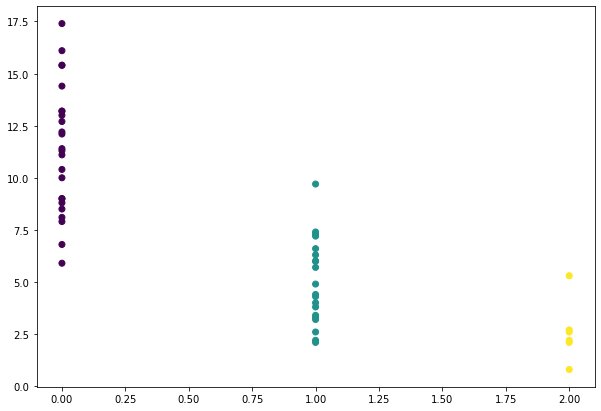

In [39]:
plt.figure(figsize=(10, 7))  
plt.scatter(crime_data2['k_clusters'],crime_data2['Murder'], c=k_clusters.labels_) 

In [40]:
from sklearn.metrics import silhouette_score
k_score = silhouette_score(crime_data_norm, k_clusters.labels_, metric='euclidean')
k_score

0.5429805198778497

In [41]:
## hierarchical_silhouette score=0.5431
## DB_SCAN_silhouette score=0.20
## K-Means_silhouette score=0.54

## Based on three types of clustering methods K-Means is performing good based on silhouette score